In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gql import gql, Client
from sklearn import preprocessing
from gql.transport.requests import RequestsHTTPTransport

In [2]:
sample_transport = RequestsHTTPTransport(
    url='https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2',
    verify=True,
    retries=3,
)
client = Client(
    transport = sample_transport
)

query = gql('''
            query pairs{
  pairs(orderBy: totalSupply) {
    
    id
    
    token0{
      symbol
      totalSupply
      tradeVolume
      tradeVolumeUSD
      txCount
      totalLiquidity
    }
    token1{
      symbol
      totalSupply
      tradeVolume
      tradeVolumeUSD
      txCount
      totalLiquidity
    }
  }
}

''')
response = client.execute(query)

In [3]:
response

{'pairs': [{'id': '0x0000871c95bb027c90089f4926fd1ba82cdd9a8b',
   'token0': {'symbol': 'HORE',
    'totalLiquidity': '0.000000000000007155',
    'totalSupply': '14336',
    'tradeVolume': '1136.139076109248718343',
    'tradeVolumeUSD': '0',
    'txCount': '37'},
   'token1': {'symbol': 'WETH',
    'totalLiquidity': '729468.486764594782997914',
    'totalSupply': '15608',
    'tradeVolume': '243407174.849669580054861962',
    'tradeVolumeUSD': '272238477110.5341605550247586786331',
    'txCount': '48151934'}},
  {'id': '0x00031554ee74e4a6d497677e5152d94c3dbe5f46',
   'token0': {'symbol': 'DATCx',
    'totalLiquidity': '0.000000000000020727',
    'totalSupply': '14336',
    'tradeVolume': '10387.715774983722683566',
    'tradeVolumeUSD': '0',
    'txCount': '23'},
   'token1': {'symbol': 'WETH',
    'totalLiquidity': '729468.486764594782997914',
    'totalSupply': '15608',
    'tradeVolume': '243407174.849669580054861962',
    'tradeVolumeUSD': '272238477110.5341605550247586786331',
  

In [4]:
pairs = []
for i in response['pairs']:
    pairs.append([
        i['token0']['symbol'],
        i['token1']['symbol'],
        i['token0']['totalLiquidity'],
        i['token1']['totalLiquidity'],
        i['token0']['totalSupply'],
        i['token1']['totalSupply'],
        i['token0']['tradeVolume'],
        i['token1']['tradeVolume'],
        i['token0']['tradeVolumeUSD'],
        i['token1']['tradeVolumeUSD'],
        i['token0']['txCount'],
        i['token1']['txCount'],
        i['id'],
    ])
df = pd.DataFrame(pairs)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,HORE,WETH,0.000000000000007155,729468.486764594782997914,14336,15608,1136.139076109248718343,243407174.849669580054861962,0,272238477110.5341605550247586786331,37,48151934,0x0000871c95bb027c90089f4926fd1ba82cdd9a8b
1,DATCx,WETH,0.000000000000020727,729468.486764594782997914,14336,15608,10387.715774983722683566,243407174.849669580054861962,0,272238477110.5341605550247586786331,23,48151934,0x00031554ee74e4a6d497677e5152d94c3dbe5f46
2,WGRT,WETH,0.000000000739214379,729468.486764594782997914,14336,15608,8239839255.322104866876024512,243407174.849669580054861962,0,272238477110.5341605550247586786331,6,48151934,0x0003713f74bc8c3435f4499eb0cbc6298cd1529d
3,SAPI,WETH,0.000000000000020216,729468.486764594782997914,14336,15608,268.957670493863942033,243407174.849669580054861962,0,272238477110.5341605550247586786331,9,48151934,0x0006bc3e52137a1873d7d8cd779a7e138bb7e929
4,MEV,WETH,0.000000000001277207,729468.486764594782997914,14336,15608,7472638.712455173598993908,243407174.849669580054861962,0,272238477110.5341605550247586786331,5,48151934,0x000a7f585c99791e49fa75fdbfbc8588a1f6ffc8
5,UNISTAKE,WETH,0.000000000000045688,729468.486764594782997914,14336,15608,23271.179142989089485303,243407174.849669580054861962,3894.964770784926896059449692258391,272238477110.5341605550247586786331,11,48151934,0x000bc4f31d2c8dcc66f6f1c93bb00920e3ea6c5d
6,UGLYSHIB,WETH,0.00000000444716489,729468.486764594782997914,14336,15608,680036618421016.128380996210325212,243407174.849669580054861962,0,272238477110.5341605550247586786331,54,48151934,0x000c5583ec00b076c41292484b3a24c3416583f0
7,CoFiX,WETH,0.000000000000001671,729468.486764594782997914,14336,15608,2071.292164613629066104,243407174.849669580054861962,0,272238477110.5341605550247586786331,70,48151934,0x000d6bc79e6d73bdd2099942f3fd4b87f8e3c33c
8,WMS,WETH,0.000000000004298318,729468.486764594782997914,14336,15608,197361624.994892127077985572,243407174.849669580054861962,0,272238477110.5341605550247586786331,36,48151934,0x0010b1d178614e65c877fc5ff8c1b469c2cdbb14
9,WETH,FSHIBA,729468.486764594782997914,0.000000000057122853,15608,14336,243407174.849669580054861962,10196332377.448287084743492543,272238477110.5341605550247586786331,0,48151934,14,0x0012ab271b58299c90b597fad5cc45e30450105c


In [5]:
df.columns=['Symbol_0',
            'Symbol_1',
            'totalLiquidity_0',
            'totalLiquidity_1',
            "totalSupply_0",
            "totalSupply_1",
            'tradeVolume_0',
            'tradeVolume_1',
            'tradeVolumeUSD_0',
            'tradeVolumeUSD_1',
            'txCount_0',
            'txCount_1',
            'pool_id'
           ]

In [6]:
df.head(10)

,Symbol_0,Symbol_1,totalLiquidity_0,totalLiquidity_1,totalSupply_0,totalSupply_1,tradeVolume_0,tradeVolume_1,tradeVolumeUSD_0,tradeVolumeUSD_1,txCount_0,txCount_1,pool_id
0,HORE,WETH,0.000000000000007155,729468.486764594782997914,14336,15608,1136.139076109248718343,243407174.849669580054861962,0,272238477110.5341605550247586786331,37,48151934,0x0000871c95bb027c90089f4926fd1ba82cdd9a8b
1,DATCx,WETH,0.000000000000020727,729468.486764594782997914,14336,15608,10387.715774983722683566,243407174.849669580054861962,0,272238477110.5341605550247586786331,23,48151934,0x00031554ee74e4a6d497677e5152d94c3dbe5f46
2,WGRT,WETH,0.000000000739214379,729468.486764594782997914,14336,15608,8239839255.322104866876024512,243407174.849669580054861962,0,272238477110.5341605550247586786331,6,48151934,0x0003713f74bc8c3435f4499eb0cbc6298cd1529d
3,SAPI,WETH,0.000000000000020216,729468.486764594782997914,14336,15608,268.957670493863942033,243407174.849669580054861962,0,272238477110.5341605550247586786331,9,48151934,0x0006bc3e52137a1873d7d8cd779a7e138bb7e929
4,MEV,WETH,0.000000000001277207,729468.486764594782997914,14336,15608,7472638.712455173598993908,243407174.849669580054861962,0,272238477110.5341605550247586786331,5,48151934,0x000a7f585c99791e49fa75fdbfbc8588a1f6ffc8
5,UNISTAKE,WETH,0.000000000000045688,729468.486764594782997914,14336,15608,23271.179142989089485303,243407174.849669580054861962,3894.964770784926896059449692258391,272238477110.5341605550247586786331,11,48151934,0x000bc4f31d2c8dcc66f6f1c93bb00920e3ea6c5d
6,UGLYSHIB,WETH,0.00000000444716489,729468.486764594782997914,14336,15608,680036618421016.128380996210325212,243407174.849669580054861962,0,272238477110.5341605550247586786331,54,48151934,0x000c5583ec00b076c41292484b3a24c3416583f0
7,CoFiX,WETH,0.000000000000001671,729468.486764594782997914,14336,15608,2071.292164613629066104,243407174.849669580054861962,0,272238477110.5341605550247586786331,70,48151934,0x000d6bc79e6d73bdd2099942f3fd4b87f8e3c33c
8,WMS,WETH,0.000000000004298318,729468.486764594782997914,14336,15608,197361624.994892127077985572,243407174.849669580054861962,0,272238477110.5341605550247586786331,36,48151934,0x0010b1d178614e65c877fc5ff8c1b469c2cdbb14
9,WETH,FSHIBA,729468.486764594782997914,0.000000000057122853,15608,14336,243407174.849669580054861962,10196332377.448287084743492543,272238477110.5341605550247586786331,0,48151934,14,0x0012ab271b58299c90b597fad5cc45e30450105c


In [7]:
df.shape

(100, 13)

In [8]:
df.describe()

,Symbol_0,Symbol_1,totalLiquidity_0,totalLiquidity_1,totalSupply_0,totalSupply_1,tradeVolume_0,tradeVolume_1,tradeVolumeUSD_0,tradeVolumeUSD_1,txCount_0,txCount_1,pool_id
count,100,100,100,100,100,100,100,100,100,100,100,100,100
unique,83,36,81,35,6,5,78,34,17,15,52,29,100
top,WETH,WETH,729468.486764594782997914,729468.486764594782997914,14336,15608,243407174.849669580054861962,243407174.849669580054861962,0,272238477110.5341605550247586786331,48151934,48151934,0x0029c2d413b34e99f0b528d3f6b5462fc0819fb8
freq,17,63,17,63,78,63,17,63,67,63,17,63,1


In [9]:
x = df[['totalLiquidity_0',
            'totalLiquidity_1',
            "totalSupply_0",
            "totalSupply_1",
            'tradeVolume_0',
            'tradeVolume_1',
            'tradeVolumeUSD_0',
            'tradeVolumeUSD_1',
            'txCount_0',
            'txCount_1',
       ]]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [10]:
df.columns=[
            'totalLiquidity_0',
            'totalLiquidity_1',
            "totalSupply_0",
            "totalSupply_1",
            'tradeVolume_0',
            'tradeVolume_1',
            'tradeVolumeUSD_0',
            'tradeVolumeUSD_1',
            'txCount_0',
            'txCount_1',
           ]

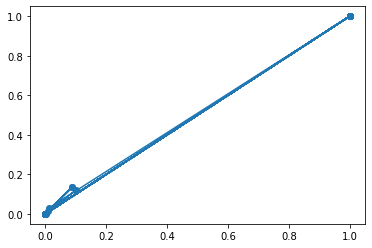

In [16]:
x1 = df['txCount_0']
y1 = df['tradeVolumeUSD_0']
plt.plot(x1, y1)

plt.show()

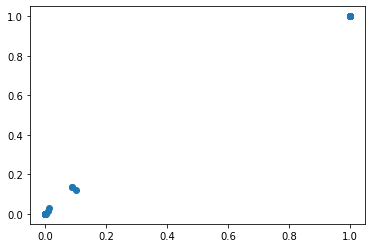

In [17]:
plt.scatter(x1, y1)

txCount and tradeVolumeUSD may increase at same time and there is a greate difference as the value is very small for the currency

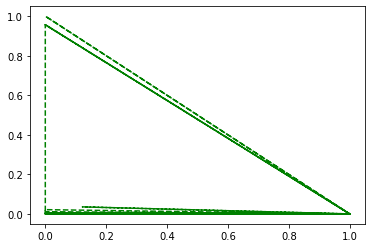

In [12]:
TL_0 = df['totalLiquidity_0']
TL_1 = df['tradeVolumeUSD_1']

plt.plot(TL_1,TL_0,  'g--')

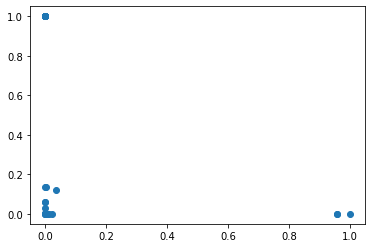

In [13]:
plt.scatter(TL_0, TL_1)

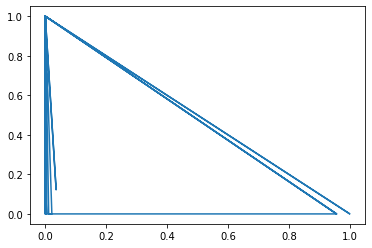

In [14]:
plt.plot(TL_0, TL_1)

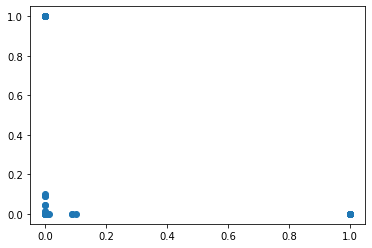

In [15]:
x = df['txCount_0']
y = df['txCount_1']
plt.scatter(x, y)